<a href="https://colab.research.google.com/github/miladshiraniUCB/dsc-phase-3-project-from-kaggle/blob/main/Project_Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Heart Diesease is one of the main causes of death in the United State and there has been several researches to understand how we can control and treat heart disease to reduce the number of death. In this work, by using the available data from [kaggle.com](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), we try to find the features that have highest impact on heart disease by introducing a comprehensive model to predict if a person will have heart disease in future or not. 

This dataset has the following columns and the dexscription of each feature is from [here](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

* `HeartDisease`, Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

* `BMI`, Body Mass Index (BMI)

* `Smoking`, Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

* `AlcoholDrinking`, Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

* `Stroke`, (Ever told) (you had) a stroke?

* `PhysicalHealth`, Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

* `MentalHealth`, Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

* `DiffWalking`, Do you have serious difficulty walking or climbing stairs?

* `Sex`, Are you male or female?

* `AgeCategory`, Fourteen-level age category

* `Race`, Imputed race/ethnicity value

* `Diabetic`, (Ever told) (you had) diabetes?

* `PhysicalActivity`, Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

* `GenHealth`, Would you say that in general your health is...

* `SleepTime`, On average, how many hours of sleep do you get in a 24-hour period?

* `Asthma`, (Ever told) (you had) asthma?

* `KidneyDisease`, Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

* `SkinCancer`, (Ever told) (you had) skin cancer?

In this work, we will use the suprevised categorial machine learning models namely: Decision Tree, Random Forest, XGBoost, and LightGBM. In addition, I will find a model with CatBoost. At the end, we will compare their results and will introduce the final model and we will introduce the features that has the highest effect on having heart disease by using the selected model.




# Functions that We use

In this part we put the functions that we will use for in several occations. 

In [1]:
def print_results(y_pred, y_test):

  ### This Function prints AUC score, f1 score, recall and precision scores.
  

  test_fpr , test_tpr , test_thresh = roc_curve(y_test, y_pred)

  test_auc = np.round(auc(test_fpr, test_tpr), 4)
  precision = np.round(precision_score(y_test, y_pred), 4)
  recall = np.round(recall_score(y_test, y_pred), 4)
  f1 = np.round(f1_score(y_test, y_pred), 4)
  confusion = confusion_matrix(y_test, y_pred)
  classification = classification_report(y_test, y_pred)


  print("Results summaries are")
  print()
  print(f"Validation AUC is        : {test_auc}")
  print(f"Test precision_score is  : {precision}")
  print(f"Test recall_score is     : {recall}")
  print(f"f1_score is              : {f1}")
  print("----------------------------------------")
  print("The Classification Report is")
  print()
  print(classification)
  print("----------------------------------------")
  print("And Confusion Matrix is")
  print()
  print(confusion)

# Importing Data and Libraries 

Because we are using Google Colab for this project, we need to import data from the [GitHub repository](https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git), so at the beginning of this work we write 

``` ! git clone https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git``` 

to import the data.

In [2]:
! git clone https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git

Cloning into 'dsc-phase-3-project-from-kaggle'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 83 (delta 26), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [3]:
import numpy as np
import pandas as pd
import io

from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE, ADASYN


# from xgboost import XGBClassifier
import xgboost as xgb


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Data can be found in (/content/dsc-phase-3-project-from-kaggle/heart_2020_cleaned.csv). To import the data we use `pd.read_csv` as shown below:

In [4]:
df = pd.read_csv("/content/dsc-phase-3-project-from-kaggle/heart_2020_cleaned.csv")
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The get insight into this data frame we use

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

By using `df.isna().sum()` we see that there is no any missing value in the dataframe

In [6]:

df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

First we will find the categorical and numerical data. Moreover, the categorical data can be divided into two subgroups one of which has only two values and the other one is multivariable. In the next blokc, we define three different dictionalries whose keys are the feature name and their values are the normalized value counts of the feature. 

In [7]:
Binray_Features_YN = {}
MultiVar_Features = {}
Numerical_features = {}

for item in df.columns:
  
  if df[item].dtype == "O" and df[item].nunique() == 2:
    Binray_Features_YN[item] = dict(df[item].value_counts(normalize = True)*100)
  if df[item].dtype == "O" and df[item].nunique() > 2:
    MultiVar_Features[item] = dict(df[item].value_counts(normalize = True)*100)
  if df[item].dtype == 'float64':
    Numerical_features[item] = dict(df[item].value_counts(normalize = True)*100)  



We will plot the data to get some idea about them. First we plot the features with only two distinct values. These features are obtained from the previous block of code and are stored in the dictionly `Binray_Features_YN`.

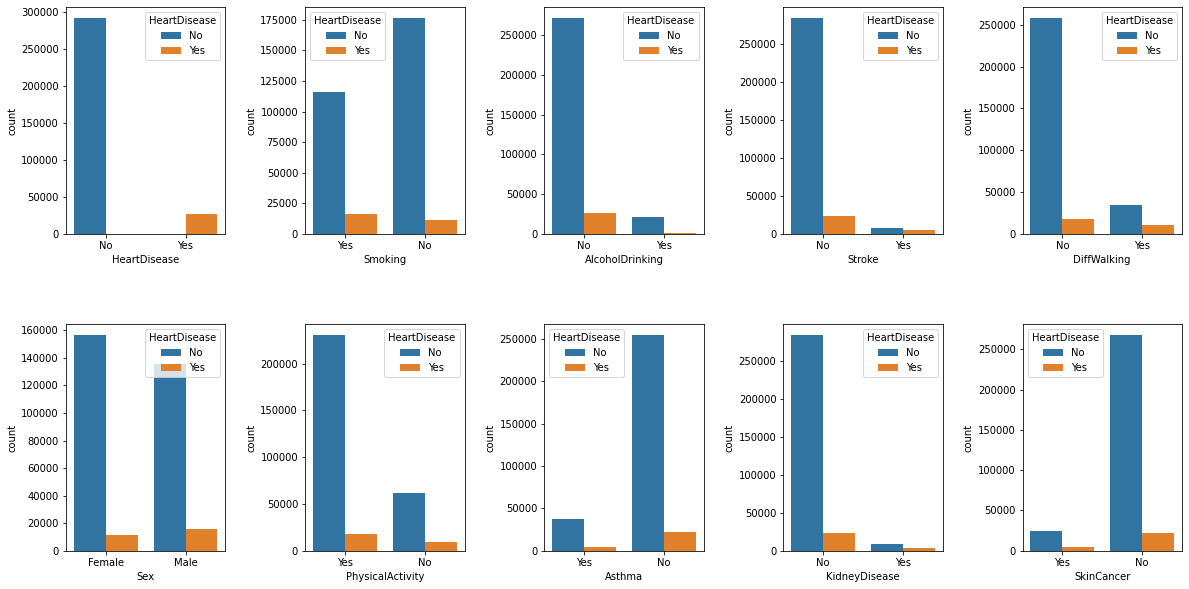

In [8]:
figs, axes = plt.subplots(nrows= 2 , ncols=5, figsize = (20, 10))

figs.subplots_adjust(hspace=0.4, wspace=0.5)

for i, item in enumerate(Binray_Features_YN):
  ax = axes[i//5][i%5]
  # sns.countplot(data=df,x="HeartDisease",hue=item, ax = ax);
  sns.countplot(data=df,x=item,hue="HeartDisease", ax = ax);
  # sns.countplot(data=df,x=df.loc[df["HeartDisease"] == "Yes"][item], ax = ax, color = "tab:blue", alpha = 0.3);
  # sns.countplot(data=df,x=df.loc[df["HeartDisease"] == "No"][item], ax = ax, color = "tab:red", alpha = 0.3);

Next, we plot the categorical features with multiple distinct values. These features are obtained from the previously and are stored in the dictionly `MultiVar_Features`.

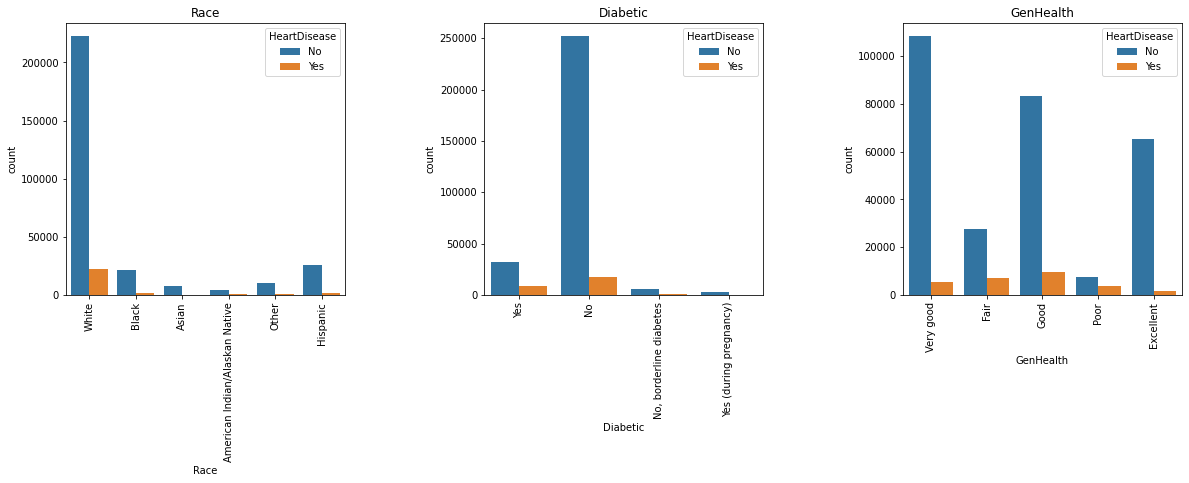

In [9]:
figs, axes = plt.subplots(nrows= 1 , ncols=3, figsize = (20, 5))

figs.subplots_adjust(hspace=0.4, wspace=0.5)
l = list(MultiVar_Features.keys())
l.remove("AgeCategory")
for i, item in enumerate(l):
  ax = axes[i]
  g = sns.countplot(data=df,x=item,hue="HeartDisease", ax = ax)
  g.set_xticklabels(labels = df[item].unique(), rotation=90)
  g.set_title(item);

And finally we will plot the numerical features which are saved in `Numerical_features`.

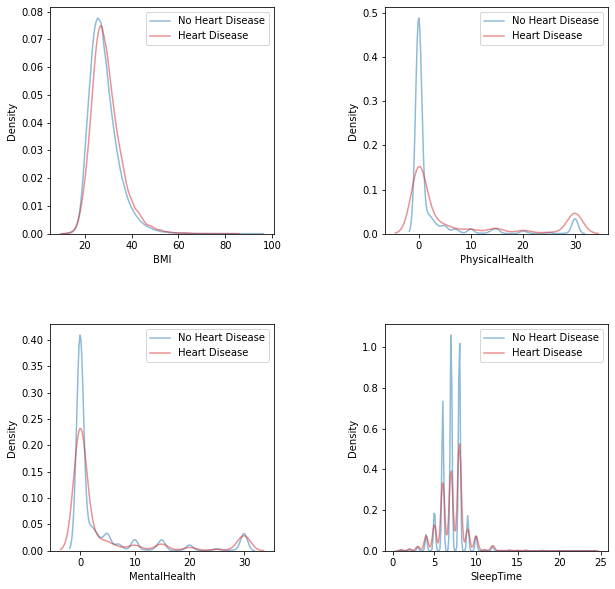

In [10]:
figs, axes = plt.subplots(nrows= 2 , ncols=2, figsize = (10, 10))

figs.subplots_adjust(hspace=0.4, wspace=0.5)

for i, item in enumerate(Numerical_features):
  
  ax = axes[i//2][i%2]
  sns.kdeplot(df.loc[df["HeartDisease"]== "No"][item], 
             color = "tab:blue", alpha = 0.5, label = "No Heart Disease", 
            ax = ax)
  sns.kdeplot(df.loc[df["HeartDisease"]== "Yes"][item], 
             color = "tab:red", alpha = 0.5, label = "Heart Disease",
             ax = ax)

  ax.legend();

It seems that `BMI` for the cases with heart disease and without heart disease have the same density. In order to see if `BMI` has an influence on the heart disease, we will plot its histogram as shown below

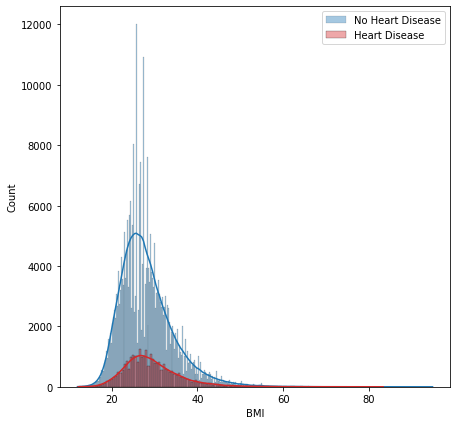

In [11]:
plt.figure(figsize=(7,7))
sns.histplot(df.loc[df["HeartDisease"]== "No"]["BMI"], 
             color = "tab:blue", alpha = 0.4, label = "No Heart Disease", 
            kde = True)
sns.histplot(df.loc[df["HeartDisease"]== "Yes"]["BMI"], 
             color = "tab:red", alpha = 0.4, label = "Heart Disease",
            kde = True)
# plt.show()
plt.legend();

# Data Preparation 

In this section, we are going to use `OneHotEncoder` to convert the categirical features itnot numerical values so thta we can use them in the rest of the modeling. One the other hand, if we check the numbera of cases that have heart diesease and the cases that do not have heart disease, we see that the data is highly imbalanced, so we need to use `SMOTE` to creat and balance the data

In [12]:
df["HeartDisease"].value_counts(normalize = True)*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

In the next block, we will do the following in each step:

* **Step 1:** We will convert binary `Yes` and `No` values to `1` and `0`, respectively. Similarly, in this step, we convert `Female` to `1` and `Male` to `0`. Therefore, the values that we get when we are comparing the importance of the results, are for those with values equal to `1`. for example, we can interpret of `Sex` as `female?` and the results that we find can be interpreted as how being identified as female will affect the chance of getting heart disease. 

* **Step 2:** In this step we will use `OneHotEncoder` from `SKLearn` to convert the multivariable features into numerical value. We will enforce drop first to reduce the collinearity. 

* **Step 3:** In this step we will normalize our numerical features to reduce the cost of computation. We will use `StandardScaler` from `SKLearn`. 

* **Step 4:** We will concatenate the different dataframes that we found in ateps 1-3 to get a dataframe to be used when spliting into train and test sets.

* **Step 5:** The last step is resampling by using `SMOTE` to take care of the imbalances in the data.

In [13]:

df_2 = df.copy()

#### STEP 1: Converting Yes to 1 and No to 0, Female to 0 and Male to 1

Yes_No_dict = {"No":0, "Yes":1, "Female":0, "Male":1} 

Yes_No_List = list(Binray_Features_YN.keys())

Yes_No_List.remove("HeartDisease")


for col in Yes_No_List:
  
  df_2[col] = df_2[col].map(Yes_No_dict)
 


#### STEP @: Encoding By using OneHotEncoder

categorical = list(MultiVar_Features.keys())
df_2_cat = df_2[categorical].copy()


ohe = OneHotEncoder(categories='auto', sparse=False)#, drop="first")

df_2_cat_encoded = ohe.fit_transform(df_2_cat)
df_2_cat_encoded_df = pd.DataFrame( 
                                   np.squeeze(df_2_cat_encoded), 
                                   columns = ohe.get_feature_names()
                                   )



##### STEP 3: Scaling By using StandardScaler
scaler = StandardScaler()

numeric = list(Numerical_features.keys())
df_2_numeric = df_2[numeric].copy()


df_2_scaled_numeric = scaler.fit_transform(df_2_numeric) 
df_2_scaled_numeric_df = pd.DataFrame(
                                      np.squeeze(df_2_scaled_numeric), 
                                      columns = df_2_numeric.columns
                                      )


#### STEP 4: Concatating New DataFrames

df_2_ready = pd.concat([df_2[Yes_No_List],
                        df_2_cat_encoded_df, 
                        df_2_scaled_numeric_df],
                        axis = 1)



y = df_2["HeartDisease"].map({"Yes": 1, "No": 0})
X = df_2_ready
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42, 
                                                    test_size = 0.2, 
                                                    stratify=y)


X_train_original = X_train.copy()
X_test_original = X_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()


#### STEP 5: Using SMOTE to take care of the sample inbalances.
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Modeling

In this part, we will find a model to fit and predict our data. The metric that we will use is `recall` because we want to discover if a person will have a heart disease or not and it is important to find a model that has a higher recall score. 
In the section we will use the following methods to find a best model

1. **Decision Tree.** Our first model is *`DecisionTreeClassifier`* without tuning its hyperparameters. Then we will use *`GrdiSearchCV`* to find the best hyperparameters for our model.

2. **Random Forest.** We will use *`RandomForestClassifier`* as the second model to fit and predict the results. Initially we will not tune the hyperparameters and will fit the model, and after that we will use `RandomizedSearchCV` to find the best hyperparameters.

3. **Extreme Gradient Boosting.** We will use *`XGBClassifier`* as our last attempt to predict the data. Initially I woudl use this model without tunning the hyperparameters and after that we will use `RandomizedSearchCV` to find the best hyperparameters.

At the end, we will use the following approaches which are not part of the curriculum, but I would like to compare their results with the other approaches. These approaches are 

1. **LightGMB.** We will use *`LightGBMClassifier`* from *`LightGBM`* and we will compare its results with previous models.

2. **CatBoost.** We will use *`CatBoostClassifier`* from *`CatBoost`* and we will compare its results with previous models. The advantages of this method is that we do not need to use `OneHotEncoder` to convert the categorical features into numerical value. However, this brings us an issue which is we cannot use `SMOTE` to deal with the imbalances in the data.



## Decision Tree

The first model that we are going to train is Decision Tree. We will use *`DecisionTreeClassifier`* from `sklearn` and then we will tune its hyperparameters.

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 5)

tree_clf.fit(X_train_smote, y_train_smote)

test_preds_tree = tree_clf.predict(X_test)

print_results(test_preds_tree, y_test)

Results summaries are

Validation AUC is        : 0.7005
Test precision_score is  : 0.1993
Test recall_score is     : 0.6426
f1_score is              : 0.3043
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     58484
           1       0.20      0.64      0.30      5475

    accuracy                           0.75     63959
   macro avg       0.58      0.70      0.58     63959
weighted avg       0.89      0.75      0.80     63959

----------------------------------------
And Confusion Matrix is

[[44353 14131]
 [ 1957  3518]]


According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

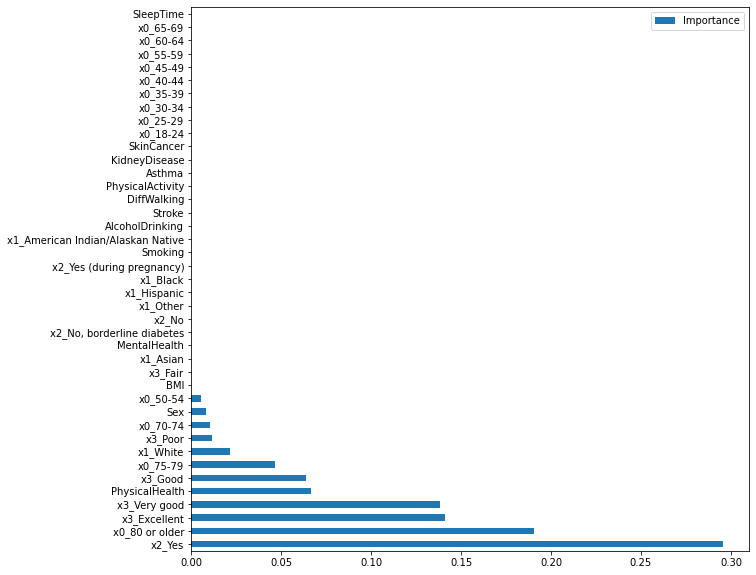

In [16]:
import matplotlib.pyplot as plt

tree_feat_importances = pd.DataFrame(tree_clf.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
tree_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
tree_feat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

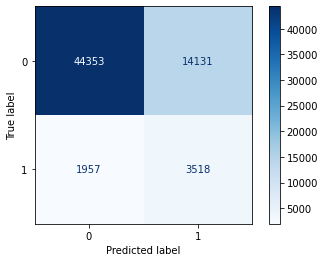

In [17]:
# Visualize your confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

**Results** are shown below. the AUC, precision, recall, and f1 scores are:

```python
Validation AUC is        : 0.7005
Test precision_score is  : 0.1993
Test recall_score is     : 0.6426
f1_score is              : 0.3043
```

Or we can take a look at the summary of the results in the following classification report.

```python

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     58484
           1       0.20      0.64      0.30      5475

    accuracy                           0.75     63959
   macro avg       0.58      0.70      0.58     63959
weighted avg       0.89      0.75      0.80     63959
```
and by using confusion matrix, we can see that our model, correctly predicted 3592 cases of heart disease out of 5475 total of heart disease in the test sets.

```python
[[44353 14131]
 [ 1957  3518]]
 ```

It is important to mention that these numbers are found for this train test split and they may change slightly other times where we have different train-test sets. In the next subsection, we will use `gridsearch` to find a better tuning parameters for the hyperprameters.

### Tunning Decision Tree

In this part, I will use `GridSearchCV` to find the best hyperparameters by tunning them. It is important to mention that it is a time consuming process and it will take times to get the result. So, I would not recommend to rerun it. 

In [18]:
tree_param_grid = {"max_depth": [5, 15, 20],
                  "min_samples_split": [2, 5, 6],
                  # "max_leaf_nodes": [2, 3],
                  "random_state" : [42], 
                  "criterion" : ["entropy", "gini"]
                  }

tree_grid = DecisionTreeClassifier()

tree_grid_search = GridSearchCV(tree_grid, tree_param_grid, cv = None)


# Fit to the data
tree_grid_search.fit(X_train_smote, y_train_smote)
test_preds_tree_grid = tree_grid_search.predict(X_test)

print_results(test_preds_tree_grid, y_test)

Results summaries are

Validation AUC is        : 0.6732
Test precision_score is  : 0.2291
Test recall_score is     : 0.5058
f1_score is              : 0.3153
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     58484
           1       0.23      0.51      0.32      5475

    accuracy                           0.81     63959
   macro avg       0.59      0.67      0.60     63959
weighted avg       0.89      0.81      0.84     63959

----------------------------------------
And Confusion Matrix is

[[49165  9319]
 [ 2706  2769]]


In [19]:
tree_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 6,
 'random_state': 42}

According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

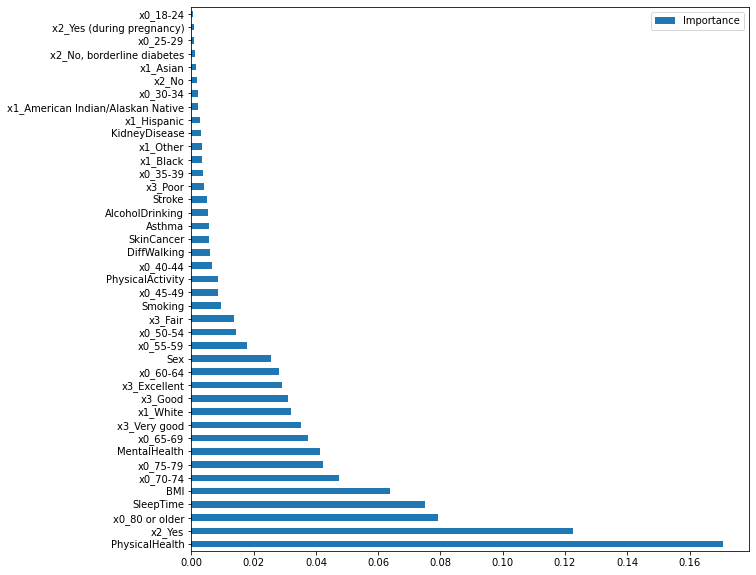

In [20]:
import matplotlib.pyplot as plt

tree_grid_feat_importances = pd.DataFrame(tree_grid_search.best_estimator_.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
tree_grid_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
tree_grid_feat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

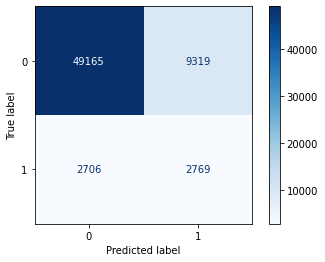

In [21]:
# Visualize your confusion matrix
plot_confusion_matrix(tree_grid_search, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

Results are shwon below, the AUC, precision, recall and f1 scores are:

```python
Validation AUC is        : 0.6732
Test precision_score is  : 0.2291
Test recall_score is     : 0.5058
f1_score is              : 0.3153
```

Or we can take a looka t the summary of the results in the following classification repot:

```python
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     58484
           1       0.23      0.51      0.32      5475

    accuracy                           0.81     63959
   macro avg       0.59      0.67      0.60     63959
weighted avg       0.89      0.81      0.84     63959
```
and by using the confusion matrix, we can see that our model correctly predicted 2572 cases of heart disease out of 5475 total cases of hear disease in the test sets.

```python
[[49165  9319]
 [ 2706  2769]]
 ```

The best paramters are found as:
```python
{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 6,
 'random_state': 42}
 ```
We can see that his tunning was not successfull because the scores we found are not better than an untunned decision tree, so we need to retunne the parameterze to find a better solution. However, we will not continue with decision tree and we will move forward to ensemble methods. In the next section we will use random forest algorithms. 

## Random Forest

The second model that we will use for this problem is `RandomForsetClassifier` from `SKLearn`. First we will not tune the model and we simply train the model by using training set and then we check the model by using test set. 

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy", bootstrap = True)

rf.fit(X_train_smote, y_train_smote)

rf_preds = rf.predict(X_test)


print_results(rf_preds, y_test)

Results summaries are

Validation AUC is        : 0.5992
Test precision_score is  : 0.2447
Test recall_score is     : 0.2791
f1_score is              : 0.2608
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58484
           1       0.24      0.28      0.26      5475

    accuracy                           0.86     63959
   macro avg       0.59      0.60      0.59     63959
weighted avg       0.87      0.86      0.87     63959

----------------------------------------
And Confusion Matrix is

[[53767  4717]
 [ 3947  1528]]


According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

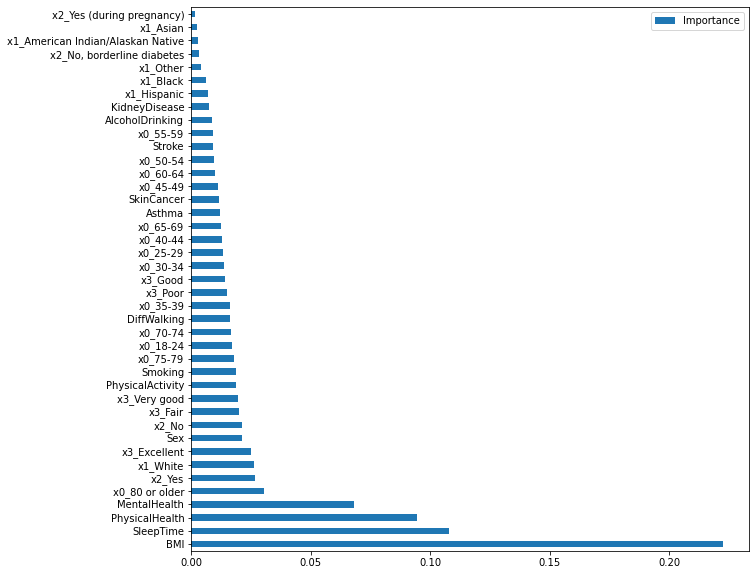

In [23]:
import matplotlib.pyplot as plt

rf_feat_importances = pd.DataFrame(rf.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
rf_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
rf_feat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

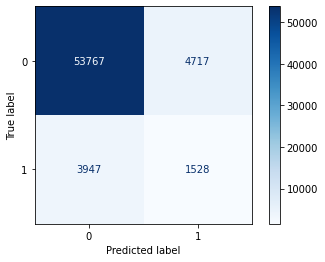

In [24]:
# Visualize your confusion matrix
plot_confusion_matrix(rf, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

**Results** are shown below, the AUC, precision, recall and f1 scores are:

```python
Validation AUC is        : 0.5992
Test precision_score is  : 0.2447
Test recall_score is     : 0.2791
f1_score is              : 0.2608
```

or we can take a look at the summary of the rresults in the following classification report. 

```python
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58484
           1       0.24      0.28      0.26      5475

    accuracy                           0.86     63959
   macro avg       0.59      0.60      0.59     63959
weighted avg       0.87      0.86      0.87     63959
```

and by using the confusion matrix, we can see that this model correctly predicted 1524 cases of heart disease out of 5475 total cases with heart disease. 

```python
[[53767  4717]
 [ 3947  1528]]
 ```

As it can be seen, this model performed very poor and we need to tune its hyperparameters to see if we can get better results. In the next section, we will use `RandomizedSearchCV` to find the best tunned hypermarameters.

### RandomForest Model Tunning


In this part we will try to find the best parameters for our random forest by using `RandomizedSearchCV` to tune the hyperparameters.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

randomized_rf = RandomForestClassifier()

params = {"max_depth": [5, 10, 15, 20],
          "criterion":["gini", "entropy"], 
          "bootstrap" :[True],
          "max_leaf_nodes": [5, 10, 15, 20],
          "min_samples_split" : [2, 4, 6, 8]
          }

rf_tunned = RandomizedSearchCV(randomized_rf, params, cv = None,
                              random_state = 42)      


# Fit to the data
rf_tunned.fit(X_train_smote, y_train_smote)
test_preds_rf_tunned = rf_tunned.predict(X_test)

print_results(test_preds_rf_tunned, y_test)

Results summaries are

Validation AUC is        : 0.7318
Test precision_score is  : 0.208
Test recall_score is     : 0.7205
f1_score is              : 0.3228
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58484
           1       0.21      0.72      0.32      5475

    accuracy                           0.74     63959
   macro avg       0.59      0.73      0.58     63959
weighted avg       0.90      0.74      0.80     63959

----------------------------------------
And Confusion Matrix is

[[43459 15025]
 [ 1530  3945]]


In [26]:
rf_tunned.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_samples_split': 8}

According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

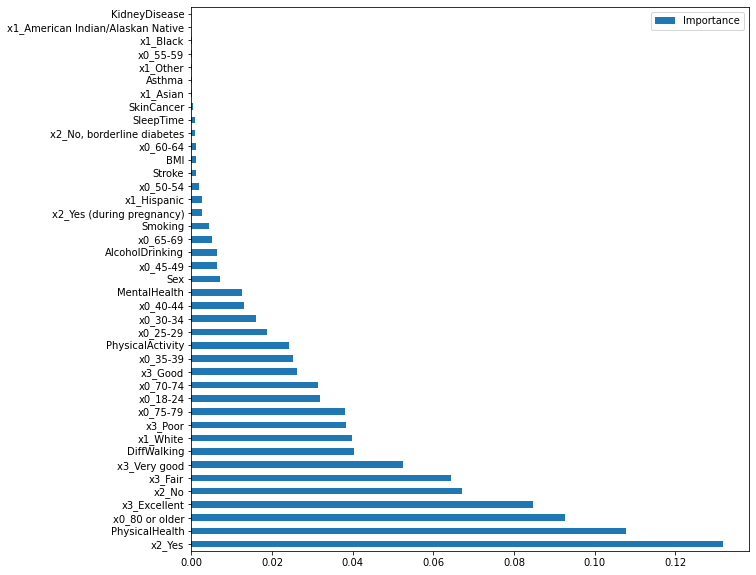

In [27]:
import matplotlib.pyplot as plt

rf_tunned_feat_importances = pd.DataFrame(rf_tunned.best_estimator_.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
rf_tunned_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
rf_tunned_feat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

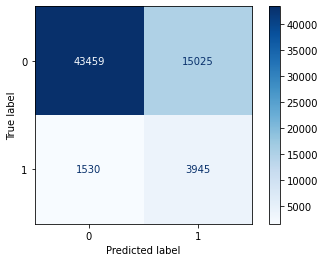

In [28]:
# Visualize your confusion matrix
plot_confusion_matrix(rf_tunned, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

**Results** of this tunning are as follows. We can find AUC, precision, recall and f1 socres as:

```python
Validation AUC is        : 0.7318
Test precision_score is  : 0.208
Test recall_score is     : 0.7205
f1_score is              : 0.3228
```

Or we can use the classifiction report to summarize the results:

```python
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58484
           1       0.21      0.72      0.32      5475

    accuracy                           0.74     63959
   macro avg       0.59      0.73      0.58     63959
weighted avg       0.90      0.74      0.80     63959
```

This tunning improved the model by detecting more correct cases of heart disease compare to previous model. In fact it detected 3939 correct cases out of 5475 cases of heart disease.

```python
[[43459 15025]
 [ 1530  3945]]
```

The best hyperparameters are found as:

```python
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_samples_split': 8}
 ```

As it can be seen this, tunning improved our model and the results are better than the two previous models.

## XGBoost

In this part we will use `XGBClassifier` from `XGBoost` library of python. First we will only use the untunned model and we will fit the data to train the model and will check it by using test set. 

In [29]:
clf = xgb.XGBClassifier(max_depth = 10, n_estimators= 15, seed=42,
                        alpha = 10, 
                        objective = 'binary:logistic', 
                        eval_metric = "auc")

clf.fit(X_train_smote, y_train_smote)

test_preds = clf.predict(X_test)

print_results(test_preds, y_test)

Results summaries are

Validation AUC is        : 0.7212
Test precision_score is  : 0.2349
Test recall_score is     : 0.6365
f1_score is              : 0.3432
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     58484
           1       0.23      0.64      0.34      5475

    accuracy                           0.79     63959
   macro avg       0.60      0.72      0.61     63959
weighted avg       0.90      0.79      0.83     63959

----------------------------------------
And Confusion Matrix is

[[47135 11349]
 [ 1990  3485]]


According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

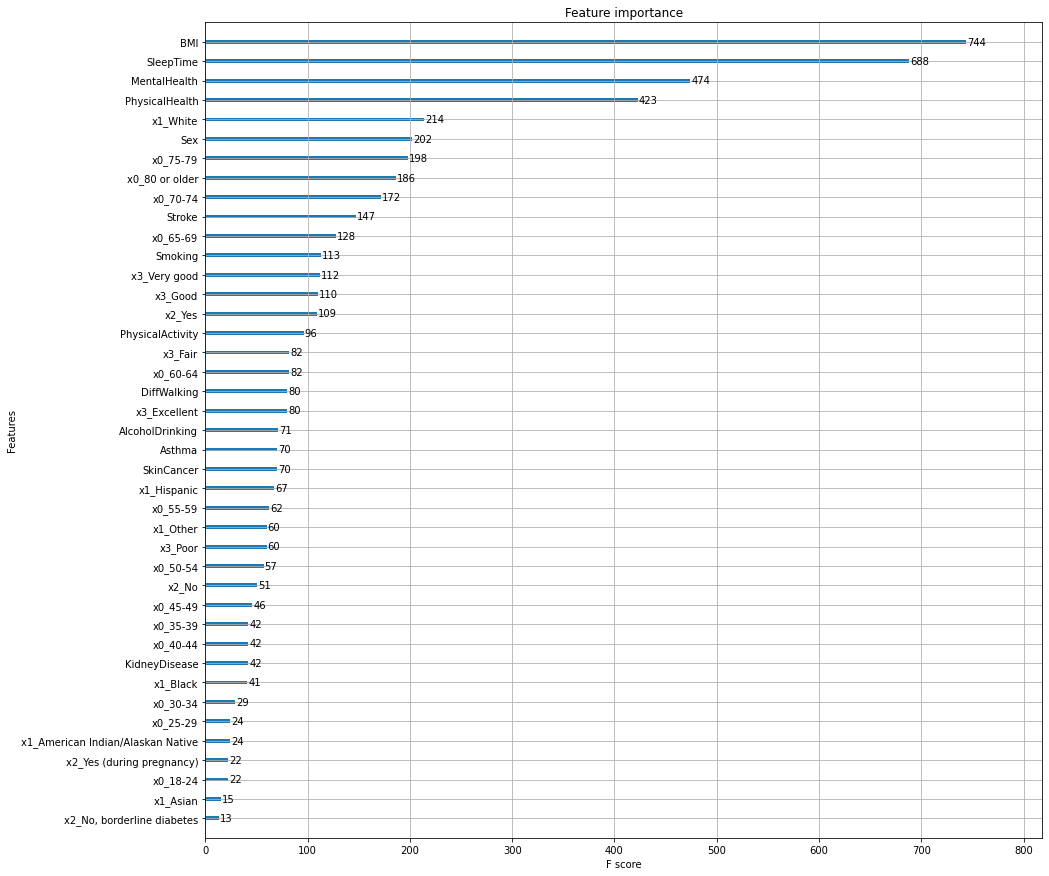

In [30]:
fig, ax = plt.subplots(1,1,figsize=(15, 15))
xgb.plot_importance(clf, ax = ax);

The confusion matrix is:

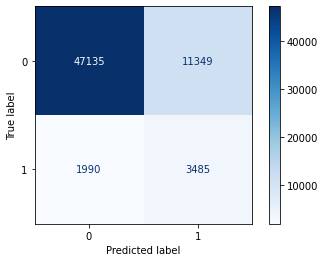

In [31]:
# Visualize your confusion matrix
plot_confusion_matrix(clf, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

**Results** are shoen below, the AUC, precision, recall and f1 scores are:

```python
Validation AUC is        : 0.7212
Test precision_score is  : 0.2349
Test recall_score is     : 0.6365
f1_score is              : 0.3432
```

Or we can take a look at the summary of the results in the following classifiction report.

```python
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     58484
           1       0.23      0.64      0.34      5475

    accuracy                           0.79     63959
   macro avg       0.60      0.72      0.61     63959
weighted avg       0.90      0.79      0.83     63959
```

and by using the confusion matrix, we can see that our model, correctly prediced 3165 cases with heart disease from the total 5475 cases with heart disease.

```python
[[47135 11349]
 [ 1990  3485]]
```

As we can see the result of this model are not better than the previous model and we will try to get better model by tunning its hyperparameters in the next section.


### XGBoost Tunning


In this section, by using `RandomizedSearchCV` we will try to find optimal hyperparamters for our `XGBoost` Model

In [32]:
xgb_param_grid = {
    "max_depth": [5, 10],
    "n_estimators": [10, 15],
    "seed": [42],
    "alpha": [10, 20, 25],
    "objective" : ['binary:logistic'], 
    "eval_metric" : ["auc"],
     "booster" : ['gbtree']
}

In [33]:
xgb_grid = xgb.XGBClassifier()

xgb_grid_search = RandomizedSearchCV(xgb_grid, xgb_param_grid, cv = None)


xgb_grid_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(estimator=XGBClassifier(),
                   param_distributions={'alpha': [10, 20, 25],
                                        'booster': ['gbtree'],
                                        'eval_metric': ['auc'],
                                        'max_depth': [5, 10],
                                        'n_estimators': [10, 15],
                                        'objective': ['binary:logistic'],
                                        'seed': [42]})

In [34]:
xgb_tunned_preds = xgb_grid_search.predict(X_test)

print_results(xgb_tunned_preds, y_test)

Results summaries are

Validation AUC is        : 0.7212
Test precision_score is  : 0.2349
Test recall_score is     : 0.6365
f1_score is              : 0.3432
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     58484
           1       0.23      0.64      0.34      5475

    accuracy                           0.79     63959
   macro avg       0.60      0.72      0.61     63959
weighted avg       0.90      0.79      0.83     63959

----------------------------------------
And Confusion Matrix is

[[47135 11349]
 [ 1990  3485]]


In [35]:
xgb_grid_search.best_params_

{'alpha': 25,
 'booster': 'gbtree',
 'eval_metric': 'auc',
 'max_depth': 10,
 'n_estimators': 15,
 'objective': 'binary:logistic',
 'seed': 42}

According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

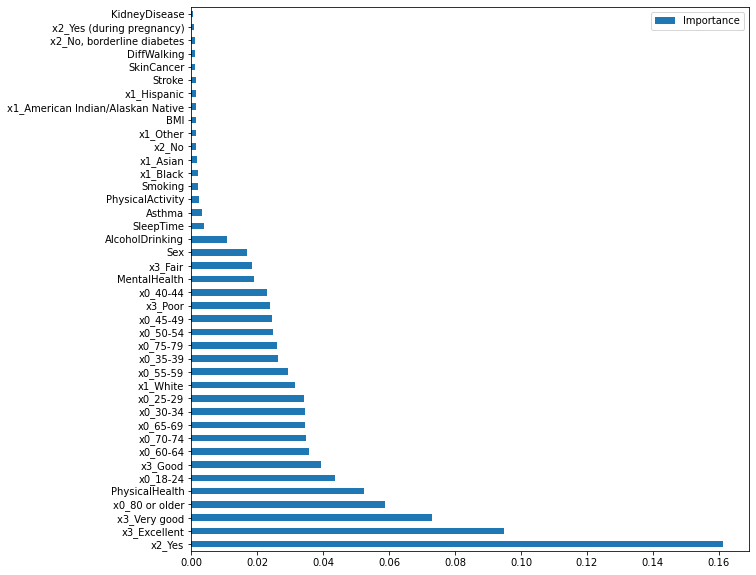

In [36]:
import matplotlib.pyplot as plt

xgb_tunned_feat_importances = pd.DataFrame(
                          xgb_grid_search.best_estimator_.feature_importances_, 
                          index=X_train_smote.columns, 
                          columns=["Importance"]
                                          )

xgb_tunned_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
xgb_tunned_feat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

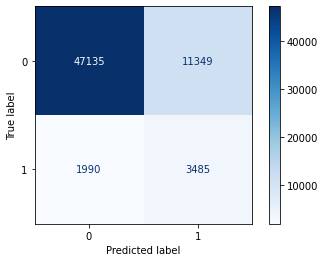

In [37]:
# Visualize your confusion matrix
plot_confusion_matrix(xgb_grid_search, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

The **R=results** of this tunning is shown below

```python
Validation AUC is        : 0.7212
Test precision_score is  : 0.2349
Test recall_score is     : 0.6365
f1_score is              : 0.3432
```

and we can take a look at the summary of results in the following classification report.

```python
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     58484
           1       0.23      0.64      0.34      5475

    accuracy                           0.79     63959
   macro avg       0.60      0.72      0.61     63959
weighted avg       0.90      0.79      0.83     63959

```

As we can see, this model prediced 3165 cases with heart disease out of 5475 total cases with heart disease. 
```python
[[47135 11349]
 [ 1990  3485]]
 ```

 The best parameters found by this search are:

 ```python 
 {'alpha': 20,
 'booster': 'gbtree',
 'eval_metric': 'auc',
 'max_depth': 10,
 'n_estimators': 15,
 'objective': 'binary:logistic',
 'seed': 42}
 ```

This model did poorly compared to previous model and if we want to get a better results, we should try other parameters. In the next section, we will try `LGBMClassifier` model from `LightGBM` library.

## LightGBM

The next model that we will use is `LGBMClassifier` from `LightGBM` library. In order to get some ideas about this machine learning method, we recommend reading [this article](https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d) and [this one](https://neptune.ai/blog/xgboost-vs-lightgbm). But in breif, `LightGBM` is faster and uses less memory to fit the data and train the model compared to `XGBoost` machine learning models.

In [38]:
import lightgbm as lgb

In [39]:
# num_boost_round=100
params = {'num_boost_round':100,
        'learning_rate':0.02,
        'objective' : 'binary',
        'feature_name' : list(X_train.columns),
        # 'cat_features': categorical,
        'depth':10,
        'eval_metric':'AUC',
        # 'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 42,
        'class_weight' :  'balanced'
          }

lgb_model = lgb.LGBMClassifier(**params)
lgb_model.fit(X_train_original, y_train_original,   
          eval_set=(X_test, y_test) );
 

[1]	valid_0's binary_logloss: 0.687164
[2]	valid_0's binary_logloss: 0.681425
[3]	valid_0's binary_logloss: 0.675923
[4]	valid_0's binary_logloss: 0.670649
[5]	valid_0's binary_logloss: 0.66558
[6]	valid_0's binary_logloss: 0.660716
[7]	valid_0's binary_logloss: 0.656035
[8]	valid_0's binary_logloss: 0.651646
[9]	valid_0's binary_logloss: 0.647334
[10]	valid_0's binary_logloss: 0.643257
[11]	valid_0's binary_logloss: 0.639264
[12]	valid_0's binary_logloss: 0.635508
[13]	valid_0's binary_logloss: 0.63187
[14]	valid_0's binary_logloss: 0.628199
[15]	valid_0's binary_logloss: 0.624823
[16]	valid_0's binary_logloss: 0.62159
[17]	valid_0's binary_logloss: 0.618403
[18]	valid_0's binary_logloss: 0.615303
[19]	valid_0's binary_logloss: 0.612362
[20]	valid_0's binary_logloss: 0.609464
[21]	valid_0's binary_logloss: 0.606676
[22]	valid_0's binary_logloss: 0.603959
[23]	valid_0's binary_logloss: 0.601413
[24]	valid_0's binary_logloss: 0.598895
[25]	valid_0's binary_logloss: 0.596427
[26]	valid_0

In [40]:
lgb_pred = lgb_model.predict(X_test)
lgb_pred
print_results(lgb_pred, y_test)

Results summaries are

Validation AUC is        : 0.76
Test precision_score is  : 0.2038
Test recall_score is     : 0.8199
f1_score is              : 0.3265
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     58484
           1       0.20      0.82      0.33      5475

    accuracy                           0.71     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.71      0.77     63959

----------------------------------------
And Confusion Matrix is

[[40948 17536]
 [  986  4489]]


According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

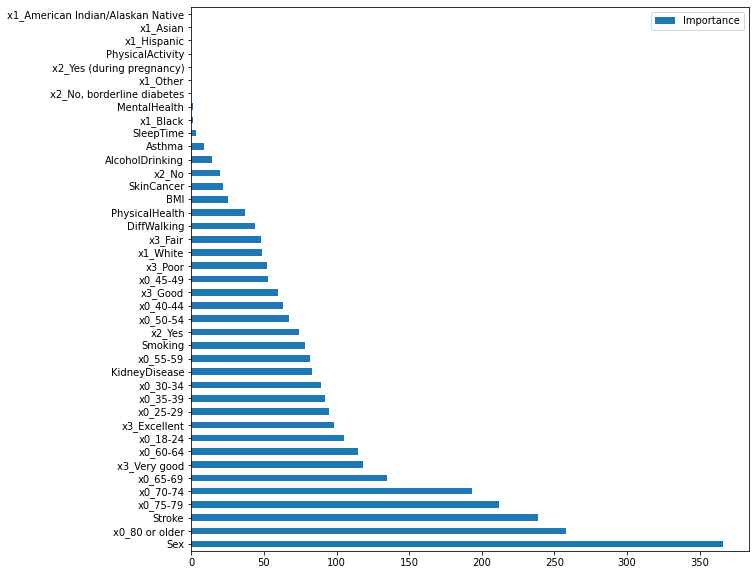

In [41]:
import matplotlib.pyplot as plt

lgb_importances = pd.DataFrame(lgb_model.feature_importances_, 
                                index=X_train.columns, columns=["Importance"])
lgb_importances.sort_values(by='Importance', ascending=False, inplace=True)
lgb_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

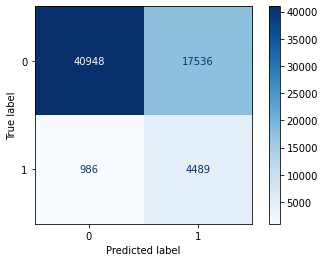

In [42]:

plot_confusion_matrix(lgb_model, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

The **results** obtained by using this model, which are AUC, precision, recall ad f1 scores, are shown below

```python 
Validation AUC is        : 0.76
Test precision_score is  : 0.2038
Test recall_score is     : 0.8199
f1_score is              : 0.3265
```

or we can take a look at the summary of the results provided in the following classification report:


```python
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     58484
           1       0.20      0.82      0.33      5475

    accuracy                           0.71     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.71      0.77     63959
```
and by using the confusion matrix, we can see that this model correctly predicted 4489 heart disease cases out of the total number of 5475 cases with heart disease.

```python
[[40948 17536]
 [  986  4489]]
 ```
It can be seen that this model gives the best results compare to the other models even without its hyperparameters being tunned. Therefore, we would select this model as our final model. However, just for the sake of completeness, we will use `CatBoostClassifier` from `CatBoost` library in the next section.  

## CatBoost

In this part, we will use `CatBoost` to model our data. First, we need to install it by using `! pip install catboost`. The reason that we would not consider it as a part of this report, is that I need to use another format of data compared to the previous models.

In [43]:
! pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [44]:
from catboost import CatBoostClassifier

In order to use `CatBoost` we do not need to encode our categorical data and as a result we do not need to use `OneHotEncoder` because `CatBoost` by itself does it. However, we have to tell `catboost` which columns are categorical and which ones are `numerical`. to do so, we need to represent them by a numerical array. So, we will do the following data preparation. We will split our data into train and test sets as usual as:

In [45]:
cat_data = df.copy()
cat_data["HeartDisease"] = cat_data["HeartDisease"].map({"Yes": 1, "No":0})
yc = cat_data["HeartDisease"]
Xc = cat_data.drop("HeartDisease", axis = 1)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc,
                                                        random_state = 42,
                                                        test_size = 0.2)

Xc_categorical = list(Xc.select_dtypes(include=['object']).columns)
Xc_numerical   = list(Xc.select_dtypes(include=['int64', 'float64']).columns)

categorical = [Xc.columns.get_loc(i) for i in Xc_categorical]
numerical = [Xc.columns.get_loc(i) for i in Xc_numerical]


However, we cannot use `SMOTE` in the case because we have not used `OneHotEncoder` to convert the categorical features. So, in order to solve the class imbalance, we may use the following code and the we can pass the `class_weights` to `CatBoost`. The code is from [here](https://stackoverflow.com/questions/57565510/usage-of-class-weights-in-catboostclassifier) or

```
https://stackoverflow.com/questions/57565510/usage-of-class-weights-in-catboostclassifier
```

In [46]:
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(yc_train)
weights = compute_class_weight(class_weight='balanced',
                               classes=classes, y=yc_train)
class_weights = dict(zip(classes, weights))

In [47]:
class_weights

{0: 0.5465296618316208, 1: 5.872916762315779}

The link to the parameters that I used is from [here](https://www.viralml.com/video-content.html?v=zKEPXQzqxe0) or 

```
https://www.viralml.com/video-content.html?v=zKEPXQzqxe0
```

In [49]:
params = {'iterations':3000,
        'learning_rate':0.01,
        'cat_features': Xc_categorical,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 42,
        'class_weights' : class_weights
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(Xc_train, yc_train,   
          eval_set=(Xc_test, yc_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );
 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7787093	best: 0.7787093 (0)	total: 586ms	remaining: 29m 17s
200:	test: 0.8264854	best: 0.8264941 (198)	total: 35.8s	remaining: 8m 18s
400:	test: 0.8325860	best: 0.8325860 (400)	total: 1m 9s	remaining: 7m 30s
600:	test: 0.8352861	best: 0.8352861 (600)	total: 1m 46s	remaining: 7m 3s
800:	test: 0.8369534	best: 0.8369534 (800)	total: 2m 21s	remaining: 6m 28s
1000:	test: 0.8379155	best: 0.8379155 (1000)	total: 2m 57s	remaining: 5m 53s
1200:	test: 0.8385447	best: 0.8385447 (1200)	total: 3m 36s	remaining: 5m 23s
1400:	test: 0.8390714	best: 0.8390714 (1400)	total: 4m 13s	remaining: 4m 49s
1600:	test: 0.8393930	best: 0.8393930 (1600)	total: 4m 50s	remaining: 4m 14s
1800:	test: 0.8396671	best: 0.8396671 (1800)	total: 5m 29s	remaining: 3m 39s
2000:	test: 0.8398866	best: 0.8398866 (2000)	total: 6m 7s	remaining: 3m 3s
2200:	test: 0.8400165	best: 0.8400165 (2200)	total: 6m 46s	remaining: 2m 27s
2400:	test: 0.8401301	best: 0.8401301 (2400)	total: 7m 26s	remaining: 1m 51s
2600:	test: 0.8402

In [50]:
cat_pred = cat_model.predict(Xc_test)
cat_pred
print_results(cat_pred, yc_test)

Results summaries are

Validation AUC is        : 0.7653
Test precision_score is  : 0.2209
Test recall_score is     : 0.8015
f1_score is              : 0.3463
----------------------------------------
The Classification Report is

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     58367
           1       0.22      0.80      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.77      0.59     63959
weighted avg       0.91      0.74      0.79     63959

----------------------------------------
And Confusion Matrix is

[[42558 15809]
 [ 1110  4482]]


According to this model, we can find the features that have the highest effect on having heart disease. These features are shown in the following diagram:

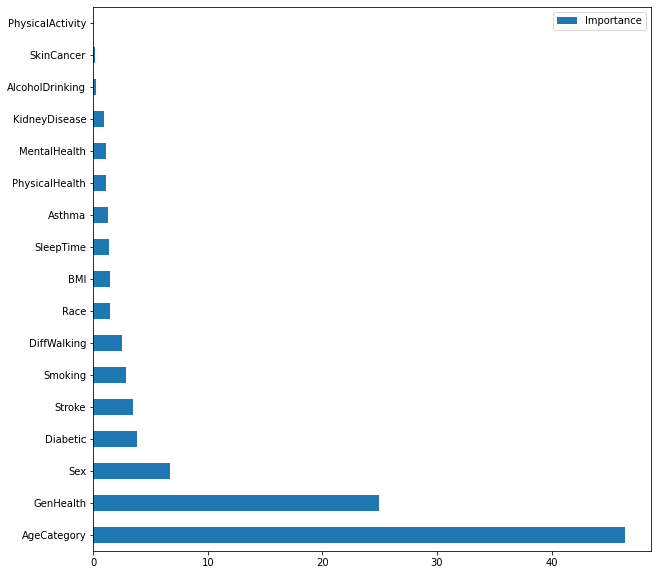

In [51]:
import matplotlib.pyplot as plt

cat_importances = pd.DataFrame(cat_model.feature_importances_, 
                                index=Xc_train.columns, columns=["Importance"])
cat_importances.sort_values(by='Importance', ascending=False, inplace=True)
cat_importances.plot(kind='barh', figsize=(10,10));

The confusion matrix is:

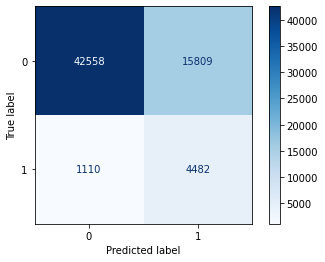

In [52]:
# Visualize your confusion matrix
plot_confusion_matrix(cat_model, Xc_test, yc_test,
                     cmap=plt.cm.Blues)
plt.show()

The **results** obtained from this model, which are AUC, precision, recall and f1 scores, are

```python
Validation AUC is        : 0.7653
Test precision_score is  : 0.2209
Test recall_score is     : 0.8015
f1_score is              : 0.3463
```
or we can take a look at the summary of the results provided in the following classification report:

```python
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     58367
           1       0.22      0.80      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.77      0.59     63959
weighted avg       0.91      0.74      0.79     63959
```

and by using the confusion matrix, we can see that this model correctly predicted 4482 cases with heart disease out of the total number of 5475 cases with heart disease.

```python
[[42558 15809]
 [ 1110  4482]]
```

As it can be seen, the results of this model is the second best results we obtained. 

# Final Model

In this section, we will introduce our final model. Since we are trying to predict if a person would have heart disease by using different features, it is rational to pick recall scores over other scores. Therefore, we will pick the model that has the highest recall score. We listed all the results in the following table

\begin{array}{c} \hline
\text{Model} & \text{AUC} & \text{Precision} & \text{Recall} & \text{F1-Score} \\ \hline
\text{Decision Tree} & 0.68 & 0.17 & 0.66 & 0.28 \\
\text{Tunned Decision Tree} & 0.66 & 0.23 & 0.47 & 0.31 \\
\text{Random Forest} & 0.60 & 0.25 & 0.28 & 0.27 \\
\text{Tunned Random Forest} & 0.74 & 0.21 & 0.72 & 0.33 \\
\text{XGBoost} & 0.71 & 0.25 & 0.58 & 0.35 \\
\text{Tunned XGBoost} & 0.71 & 0.25 & 0.58 & 0.35 \\
\text{LightGBM} & 0.76 & 0.201 & 0.82 & 0.33 \\
\text{CatBoost} & 0.77 & 0.22 & 0.80  & 0.35\\ \hline
\end{array}

From this table we realize that `LightGBM` has the highest recall score and as a result we will consider this as our final model. 

According to this model the gender (female) has the highest effect on having heart disease and after that, people older than 80 years old have the highest probability of getting heart disease. Then, stroke and again age categories of 75-79 and 70-74 have the highest probability.

If we check the important features in the model derived by `CatBoost`, we see that age category, genetich health and sex (female) are the first three important features. 

# Summary and Conclusion



Since heart disease is one of the main causes of death in United States and the rest of the world, we decided to study and analyze the data on heart disease and understant how different features affect it. The data we used is from [kaggle.com](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) that contains 319795 rows and 18 columns. Our data contains several categorical features as well as numerical features. 

In this work, we used different binary classification machine learning approaches namely, Decision Tree, Random Forest, XGBoost, LightGBM and CatBoost. To prepare our data, we converted categorical features to numerical values so that we can use them in our models. Moreover, because our data is imbalanced, we need to resample it by using SMOTE. Moreover, we splited our data to train and test sets, and we used these sets to train the model and test it, respectively. 

Since we want to have a model that can predict as much cases with heart disease as possible, we choose recall score as the maetric and the model with the highest recall is chosen. According to this metric, we realized that `LightGBM` has the highest recall number, according to which gender (female) and being older than 80 years old are the two first important features. 

It is important to note that one could get another result if they use other approaches with different tuned hyperparameters; therefore, the results of this study are not abolute and are relative. In addition, for getting a better model we would recommend gathering other data with different features and add them to the data that we used. This way, the resuls might be more reliable and the model might have better results. 

